In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/patients-data-for-medical-field/Patients Data ( Used for Heart Disease Prediction ).xlsx


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
sns.set_theme(style="white")
palette=['#B0C4DE','#006400','#0099CC',' #CCFFFF']

/kaggle/input/patients-data-for-medical-field/Patients Data ( Used for Heart Disease Prediction ).xlsx


In [3]:
df=pd.read_excel("/kaggle/input/patients-data-for-medical-field/Patients Data ( Used for Heart Disease Prediction ).xlsx")

In [5]:
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [7]:
#df.drop(['PatientID'], axis=1, inplace=True)
object_cols = df.select_dtypes(include=['object']).columns.tolist() 
print("Object columns:", object_cols)
int_cols=df.select_dtypes(include=['int64']).columns.tolist() 
print("Int columns:", int_cols)
float_cols=df.select_dtypes(include=['float64']).columns.tolist() 
print("Float columns:", float_cols)

Object columns: ['State', 'Sex', 'GeneralHealth', 'AgeCategory', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'TetanusLast10Tdap']
Int columns: ['PatientID', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos']
Float columns: ['HeightInMeters', 'WeightInKilograms', 'BMI']


In [11]:
numeric_cols=["HeightInMeters","WeightInKilograms","BMI"]
bool_cols=int_cols+float_cols
for col in numeric_cols:
    bool_cols.remove(col)

In [12]:
for col in bool_cols:
    df[col]=df[col].astype(bool)

In [13]:
unique_counts = df[object_cols].nunique()
# Get list of unique values from each column
unique_values_list = []
for column_name, count in unique_counts.items():
    unique_values = df[column_name].unique().tolist()
    unique_values_list.append(unique_values)
for column_name, unique_values in zip(unique_counts.index, unique_values_list):
    print(f"Column: {column_name}")
    print(f"Values: {unique_values}")
    print()

Column: State
Values: ['Alabama', 'Alaska', 'Arizona', 'California', 'Arkansas', 'Connecticut', 'Colorado', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'District of Columbia', 'Kansas', 'Iowa', 'Maryland', 'Minnesota', 'Montana', 'New Jersey', 'Nebraska', 'New York', 'Ohio', 'Oklahoma', 'Texas', 'Vermont', 'Washington', 'Utah', 'Illinois', 'West Virginia', 'Virginia', 'Massachusetts', 'Kentucky', 'Louisiana', 'Maine', 'Wisconsin', 'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Hampshire', 'New Mexico', 'South Carolina', 'North Carolina', 'North Dakota', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Tennessee', 'Wyoming', 'Guam', 'Puerto Rico', 'Virgin Islands']

Column: Sex
Values: ['Female', 'Male']

Column: GeneralHealth
Values: ['Fair', 'Very good', 'Excellent', 'Good', 'Poor']

Column: AgeCategory
Values: ['Age 75 to 79', 'Age 65 to 69', 'Age 60 to 64', 'Age 70 to 74', 'Age 50 to 54', 'Age 80 or older', 'Age 55 to 59', 'Age 25 to 29', 'Age 40

In [14]:
unique_counts = df[object_cols].nunique() 
print(unique_counts)

State                    54
Sex                       2
GeneralHealth             5
AgeCategory              13
HadDiabetes               4
SmokerStatus              4
ECigaretteUsage           4
RaceEthnicityCategory     5
TetanusLast10Tdap         4
dtype: int64


In [16]:
null_counts = df.isnull().sum()
columns_with_nan = null_counts[null_counts > 0]
# Print the columns with NaN values
for column_name, count in columns_with_nan.items():
    print(f"Column: {column_name}")
    print(f"Number of NaN values: {count}")
    print()
    

In [18]:
#Functions

def create_graph_generate_proportion(df, statistics_column, target_column):
    create_graph(df, statistics_column, target_column)
    calculate_proportion(df, statistics_column, target_column)

def create_graph(df, statistics_column, target_column):
    plt.figure(figsize=(10, 6)) 
    distribution=sns.countplot(data=df,x=statistics_column, hue=target_column, palette=palette)
    for container in distribution.containers:
        distribution.bar_label(container)
    if len(df[statistics_column].unique()) > 2:
        plt.xticks(rotation=90)
        
def calculate_proportion(df, statistics_column, target_column):
    print(" For column "+statistics_column)
    GeneralHealth_Categories=df[statistics_column].unique()
    for  categorie in GeneralHealth_Categories:
        heartAttack_Count=((df[target_column]==1) & (df[statistics_column]==categorie)).sum()
        proportion=heartAttack_Count/(df[statistics_column]==categorie).sum()*100
        print(f"For categorie {categorie} rate is {proportion}")

In [19]:
#Analysis for HadHeartAttack
df['HadHeartAttack'].value_counts()

HadHeartAttack
False    224429
True      13201
Name: count, dtype: int64

In [20]:
proportion = (df['HadHeartAttack'] == 1).sum() / len(df)*100
print(f"Had Heart Attack proportion: {proportion}%")

Had Heart Attack proportion: 5.55527500736439%


Too many categories present in State only statictics will be provided
 For column State
For categorie Alabama rate is 6.542553191489361
For categorie Alaska rate is 5.193548387096774
For categorie Arizona rate is 6.714447378347793
For categorie California rate is 4.290772755675901
For categorie Arkansas rate is 8.365150989239847
For categorie Connecticut rate is 4.679958027282267
For categorie Colorado rate is 4.162477377840338
For categorie Delaware rate is 5.05050505050505
For categorie Florida rate is 7.762492981471084
For categorie Georgia rate is 5.617283950617284
For categorie Hawaii rate is 4.618015963511972
For categorie Idaho rate is 4.861520329994107
For categorie Indiana rate is 6.193213424809938
For categorie District of Columbia rate is 3.5194174757281553
For categorie Kansas rate is 5.45
For categorie Iowa rate is 4.861616897305171
For categorie Maryland rate is 5.512078938414427
For categorie Minnesota rate is 4.4421487603305785
For categorie Montana rate is 5.6799037304

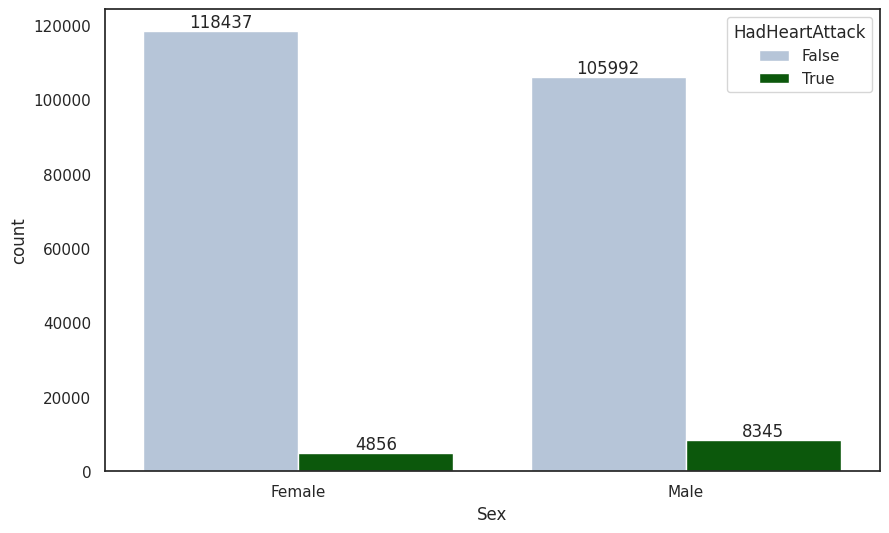

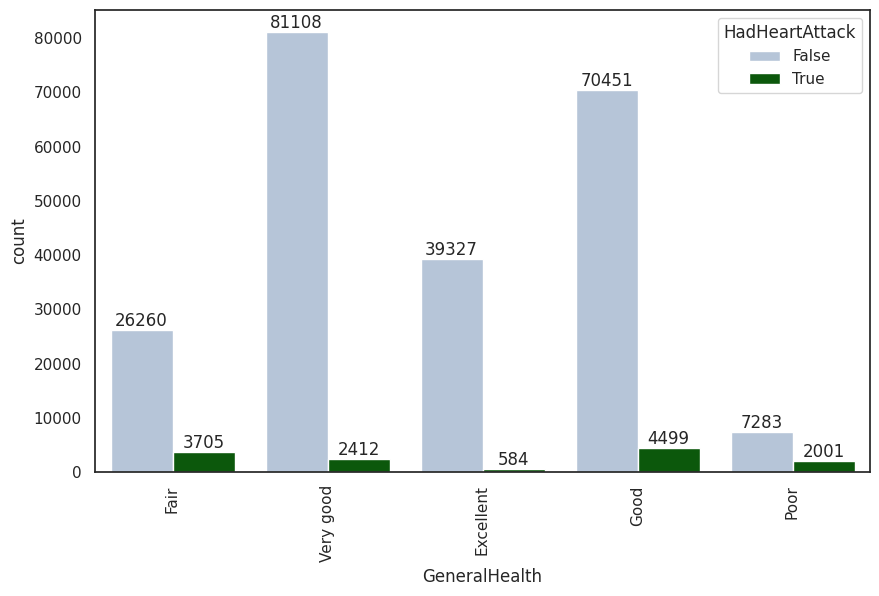

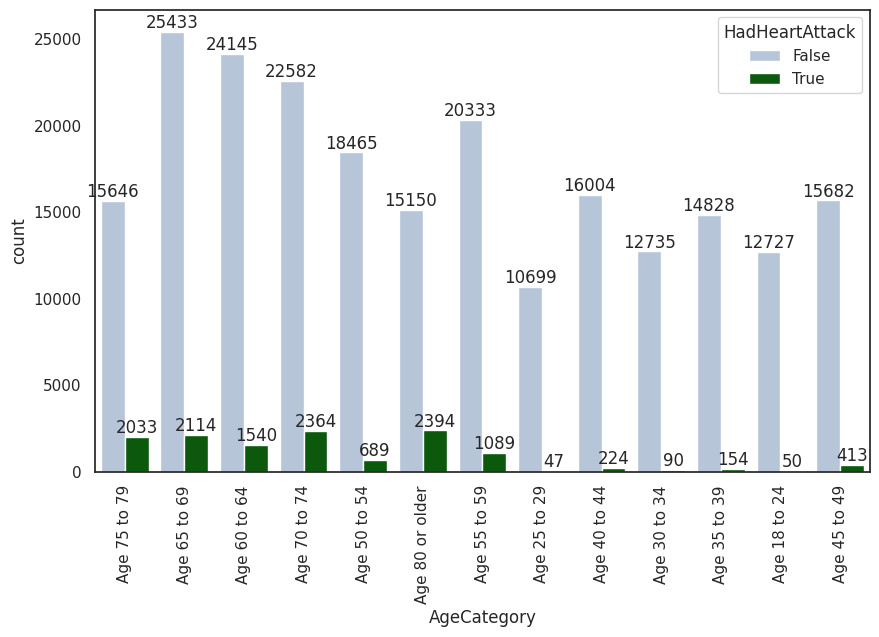

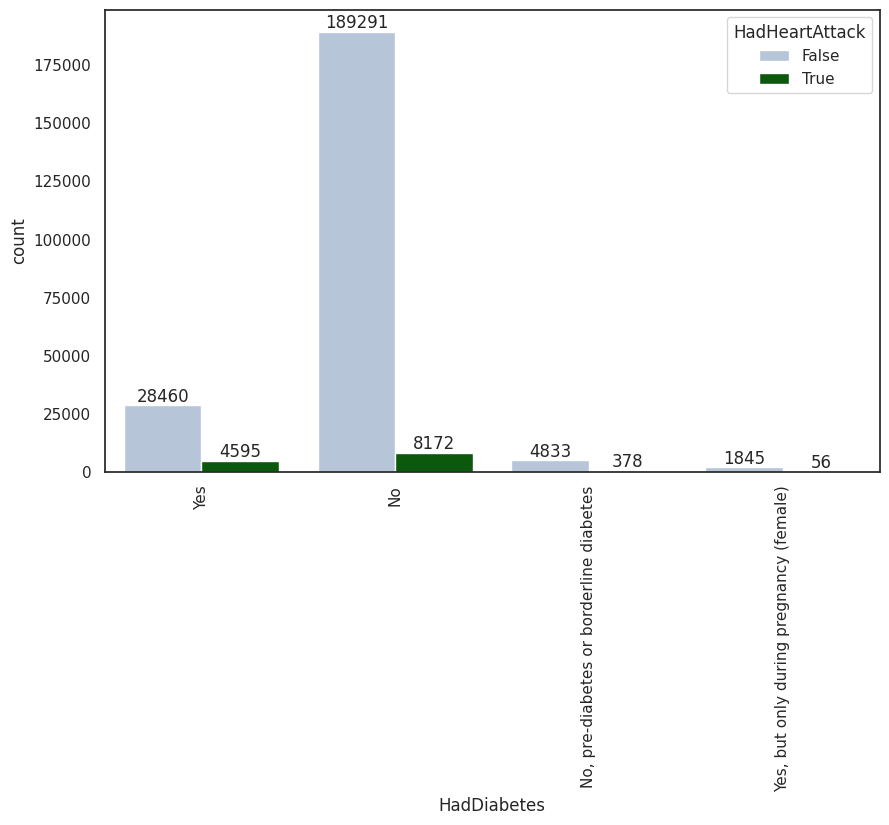

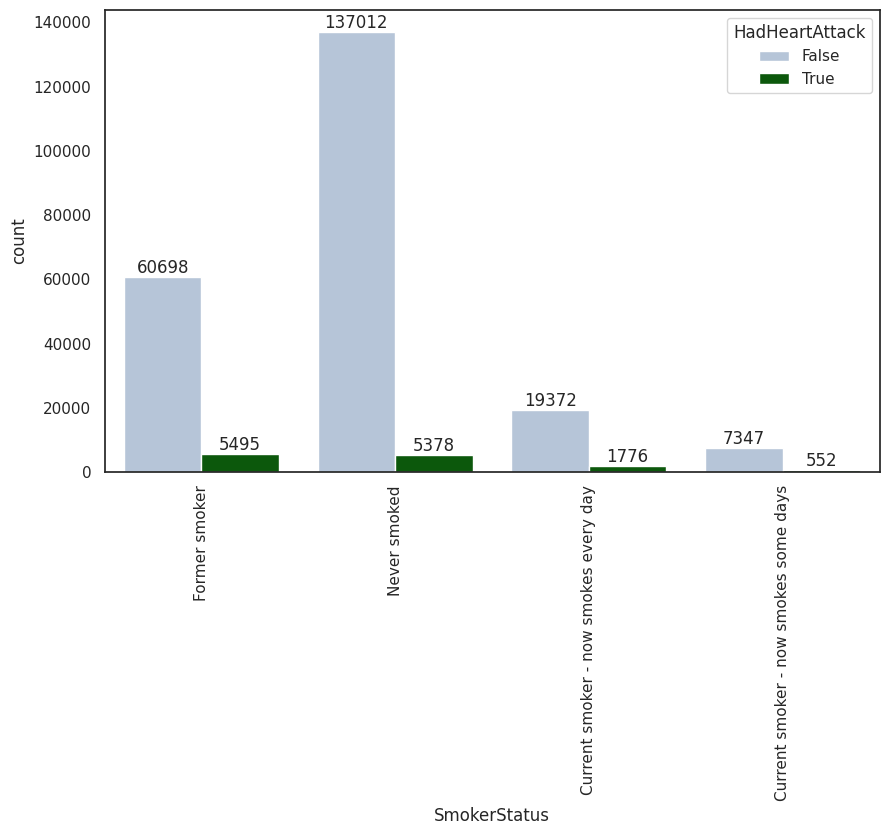

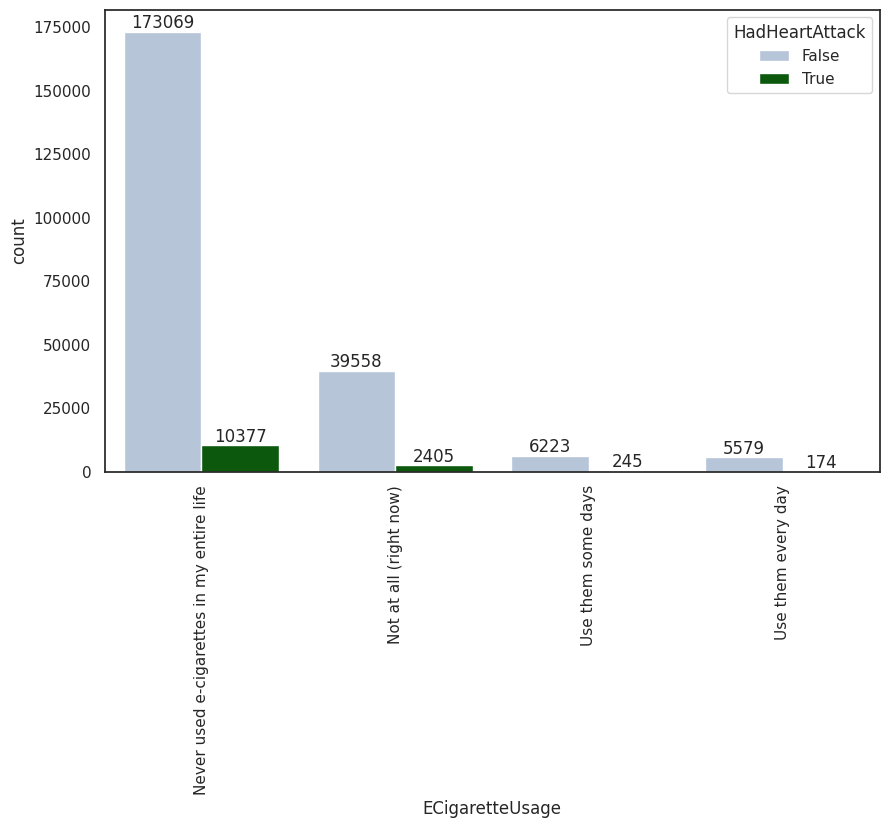

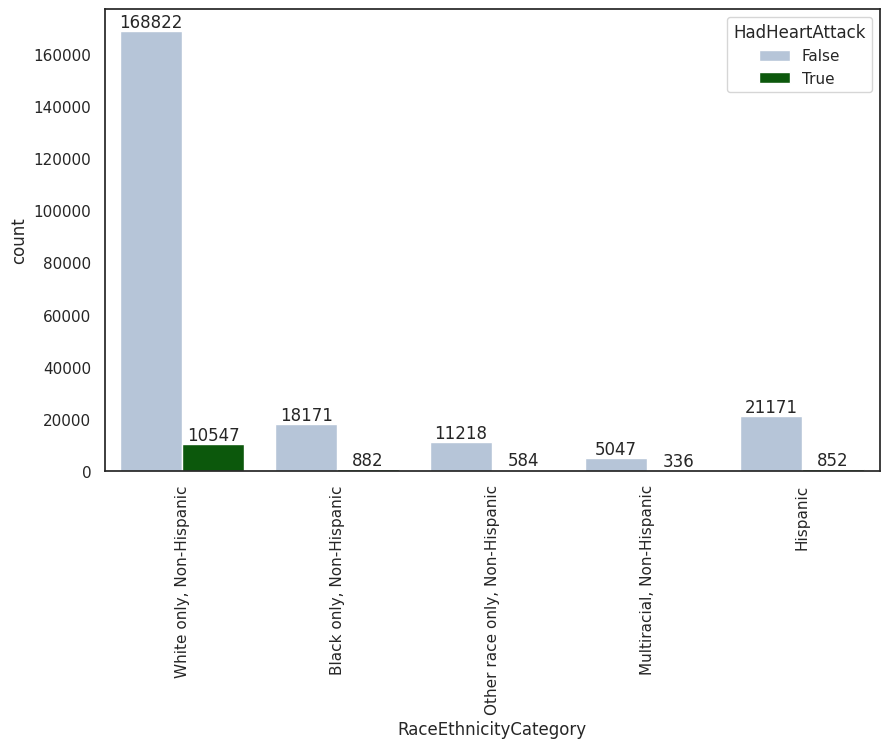

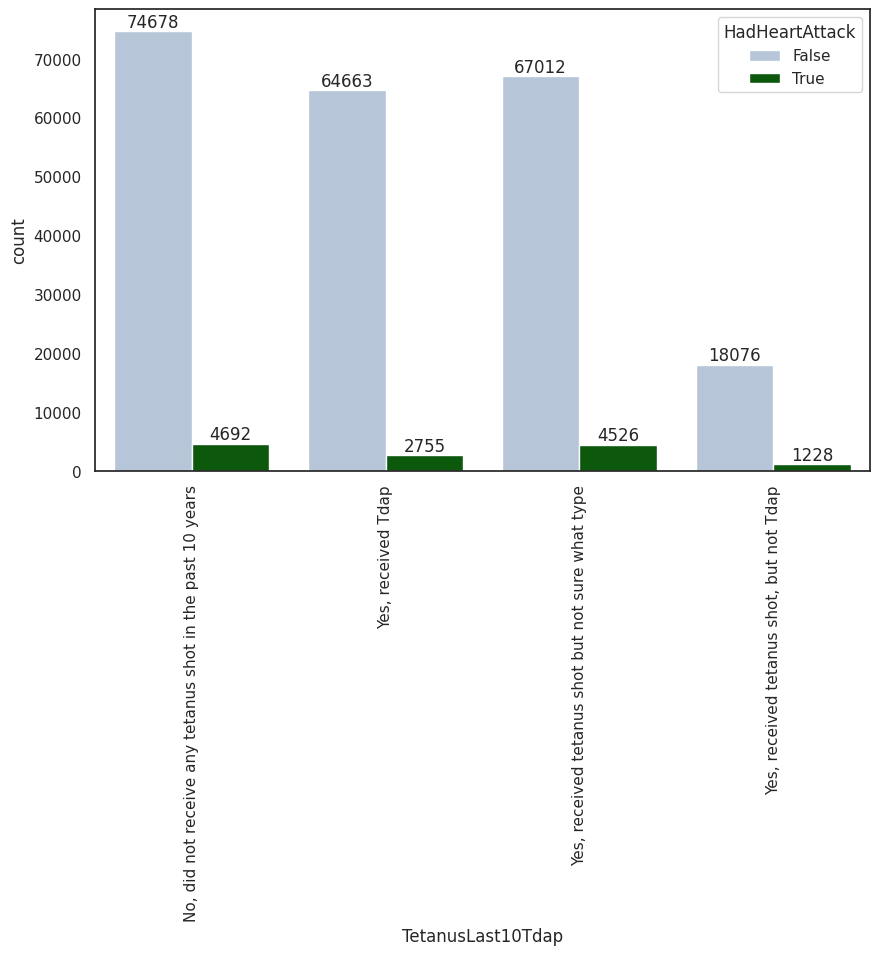

In [21]:
target_column='HadHeartAttack'
for obj_col in object_cols:
    if len(df[obj_col].unique())>=20:
        print("Too many categories present in "+ obj_col+" only statictics will be provided")
        calculate_proportion(df,obj_col, target_column)
    else:
        print()
        create_graph_generate_proportion(df, obj_col, 'HadHeartAttack')

In [22]:
df[numeric_cols].describe()

,HeightInMeters,WeightInKilograms,BMI
count,237630.000000,237630.000000,237630.000000
mean,1.704990,83.667908,28.691602
std,0.106776,21.360982,6.528065
min,0.910000,28.120001,12.020000
25%,1.630000,68.040001,24.280001
50%,1.700000,81.650002,27.459999
75%,1.780000,95.250000,31.900000
max,2.410000,292.570007,97.650002


In [23]:
print(bool_cols)
for col in bool_cols:
    df[col]=df[col].astype(bool)

['PatientID', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos']


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  bool   
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  bool   
 9   HadAngina                  237630 non-null  bool   
 10  HadStroke                  237630 non-null  bool   
 11  HadAsthma                  237630 non-null  bool   
 12  HadSkinCancer              237630 non-null  bool   
 13  HadCOPD                    23

In [4]:
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0



 For column PatientID
For categorie True rate is 5.55527500736439

 For column HadHeartAttack
For categorie False rate is 0.0
For categorie True rate is 100.0

 For column HadAngina
For categorie True rate is 45.50181295751522
For categorie False rate is 2.937048512866963

 For column HadStroke
For categorie False rate is 4.705272680960202
For categorie True rate is 25.050362610797745

 For column HadAsthma
For categorie True rate is 6.885413124787487
For categorie False rate is 5.323270962448971

 For column HadSkinCancer
For categorie True rate is 9.273158206596879
For categorie False rate is 5.208898784605618

 For column HadCOPD
For categorie False rate is 4.666983216757674
For categorie True rate is 16.01440705300505

 For column HadDepressiveDisorder
For categorie False rate is 5.275678997954794
For categorie True rate is 6.634489528795812

 For column HadKidneyDisease
For categorie False rate is 5.000419239103094
For categorie True rate is 16.95529966452081

 For column HadArth

/tmp/ipykernel_37/3152756091.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


 For column HighRiskLastYear
For categorie False rate is 5.658286950328418
For categorie True rate is 3.2527515723270444

 For column CovidPos
For categorie True rate is 4.870314544110118
For categorie False rate is 5.843185540267534


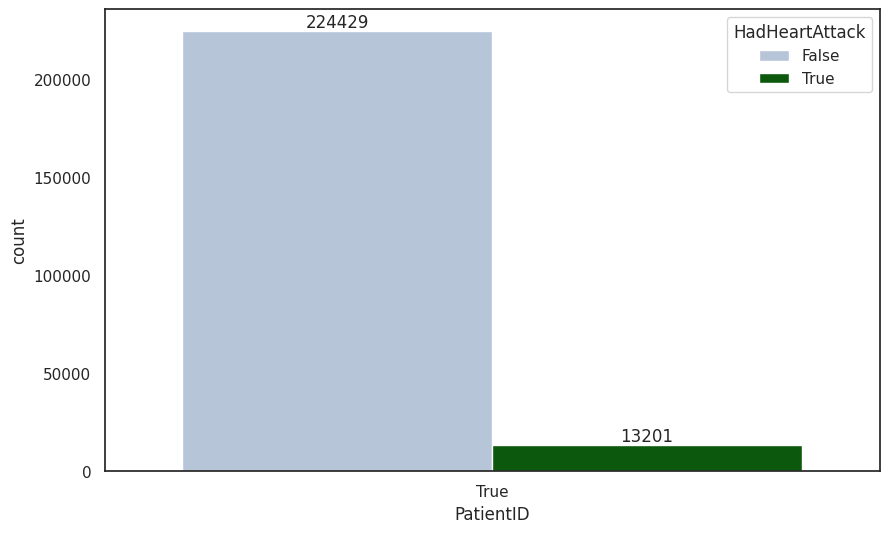

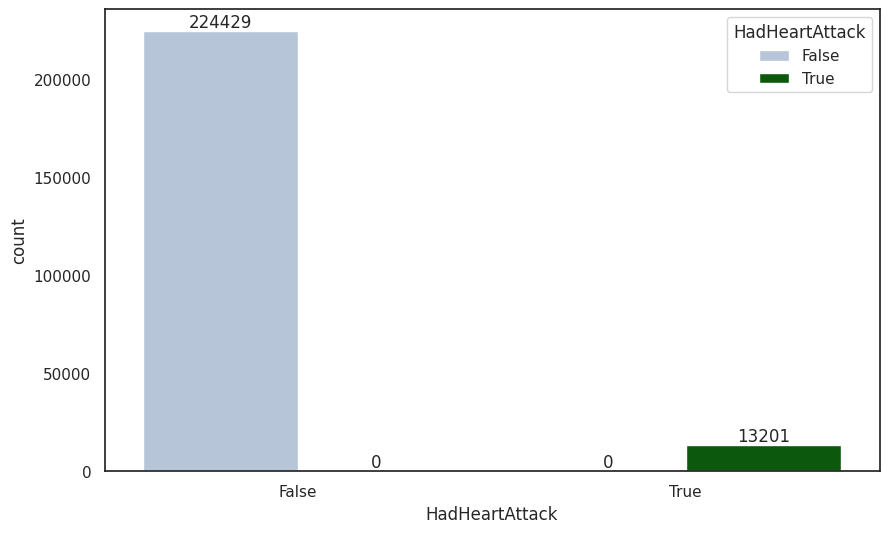

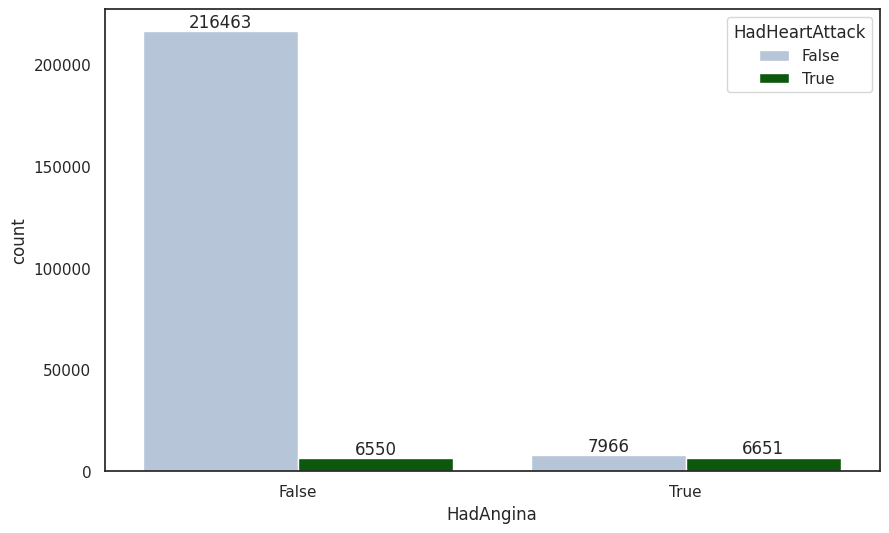

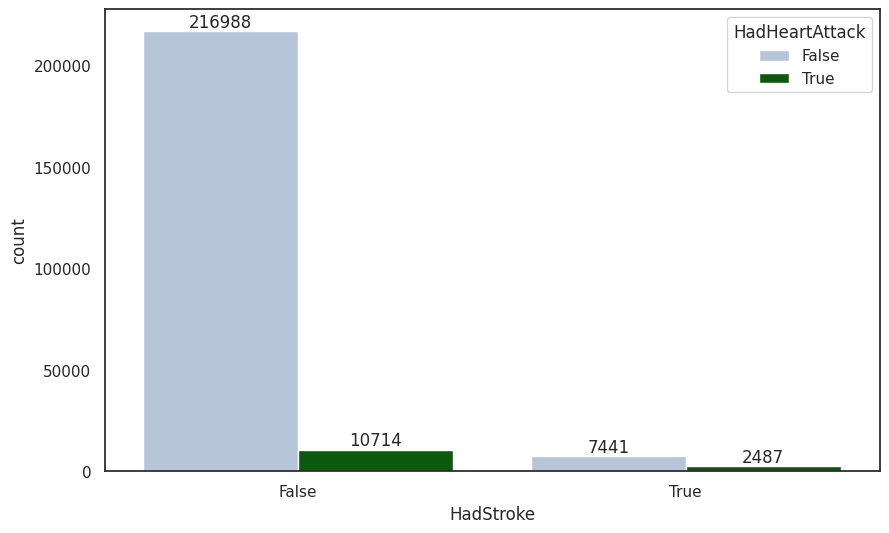

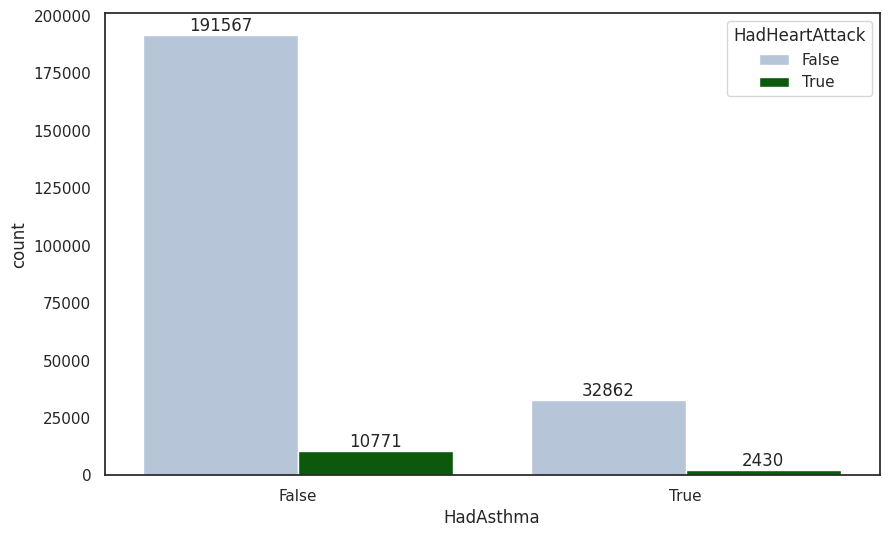

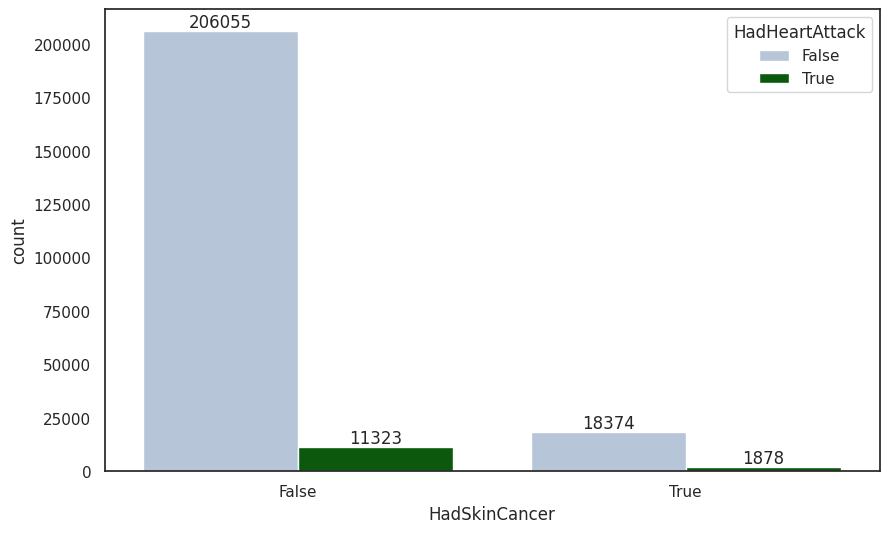

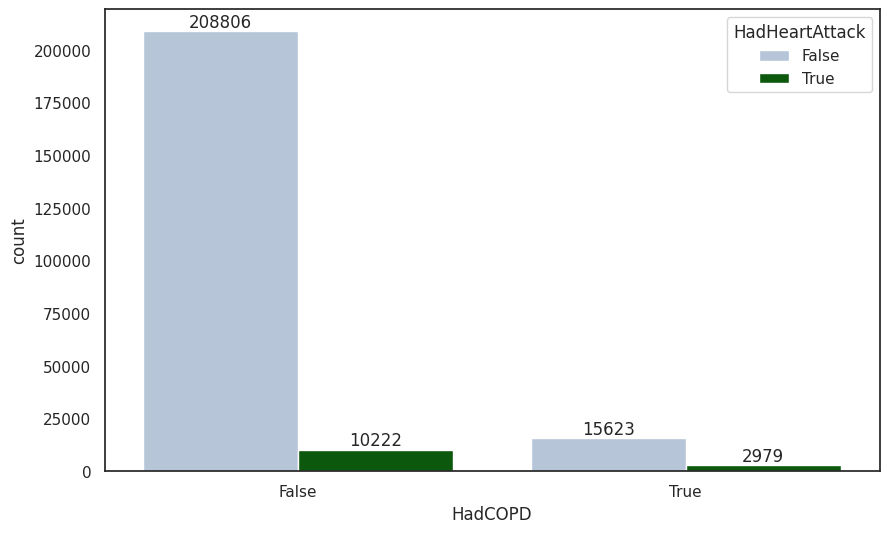

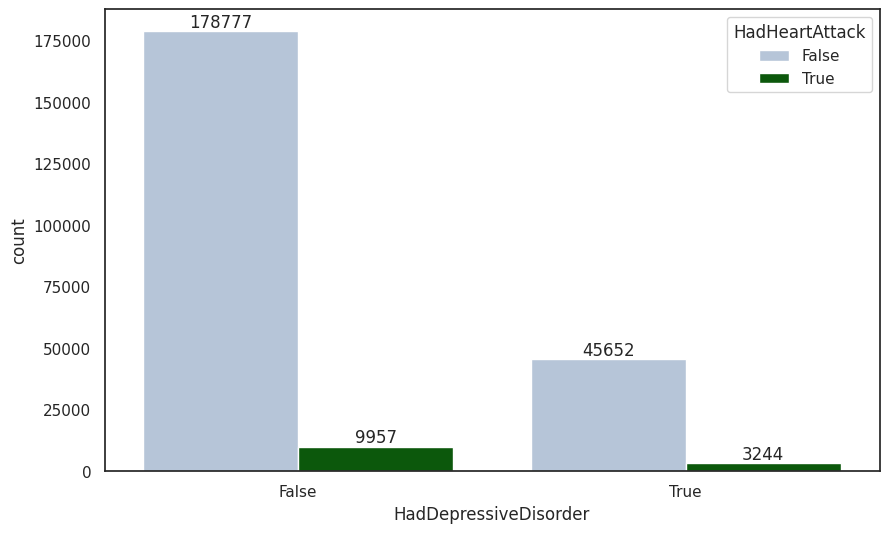

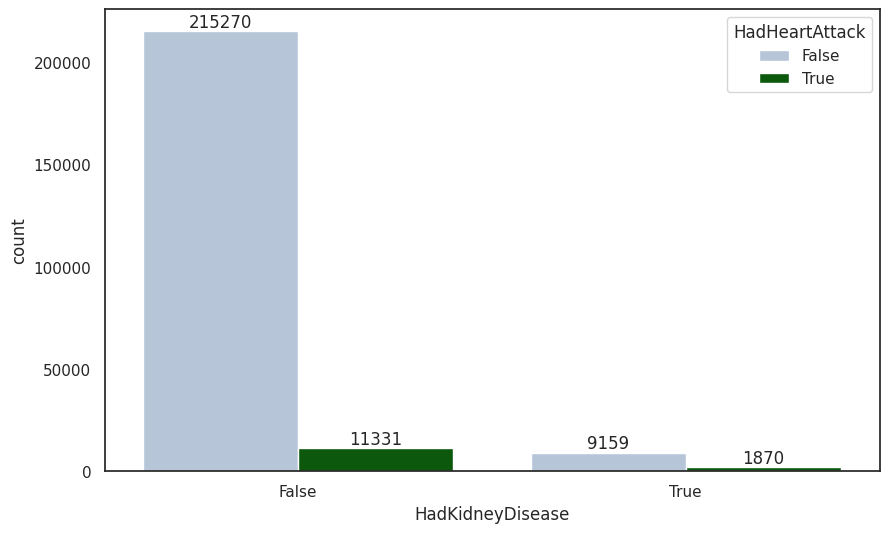

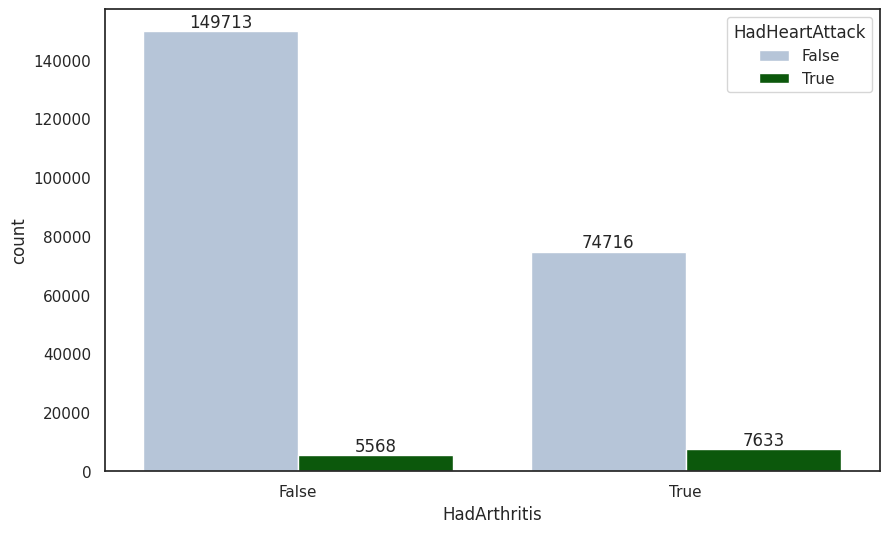

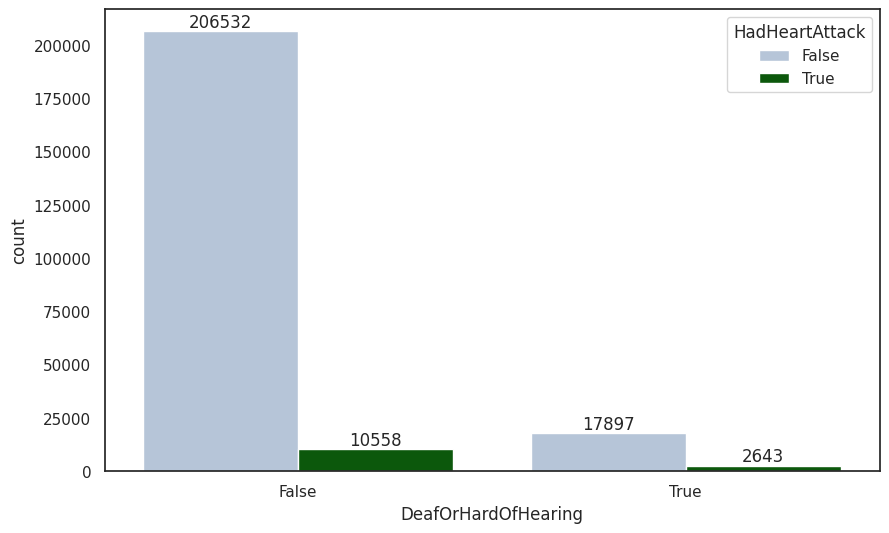

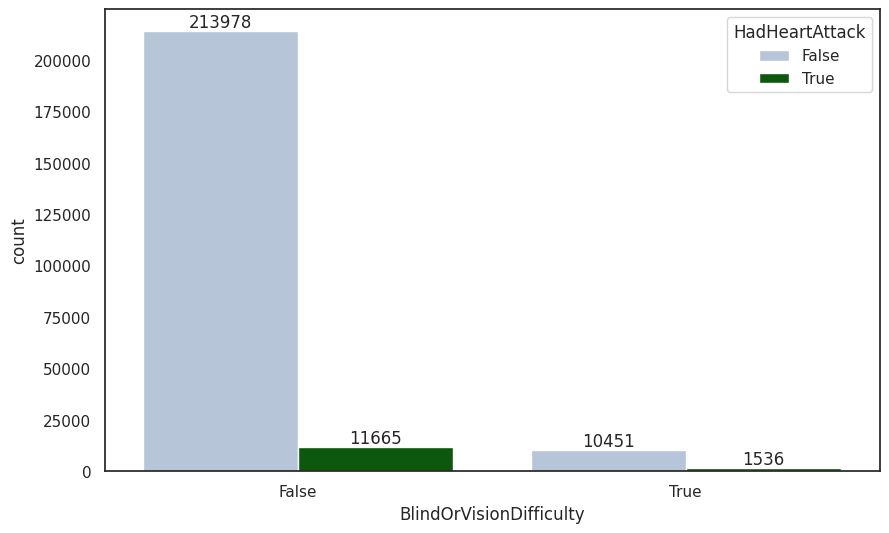

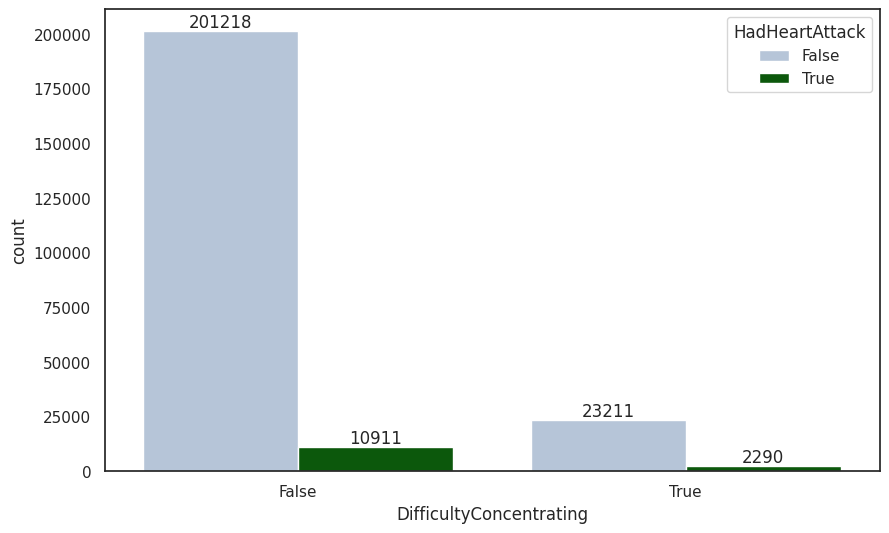

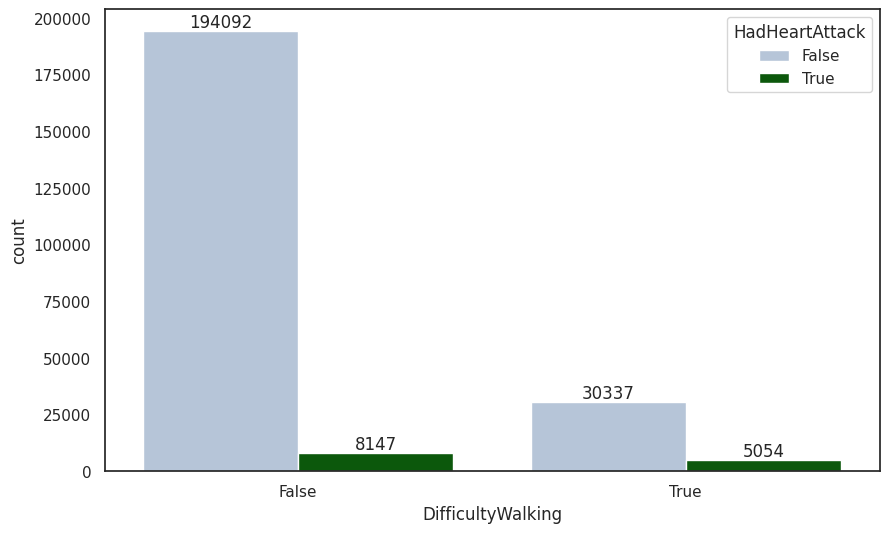

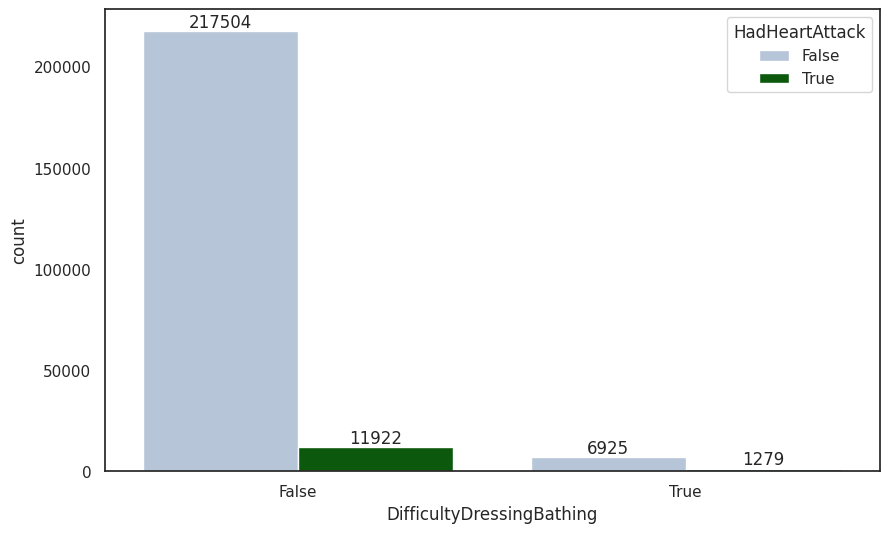

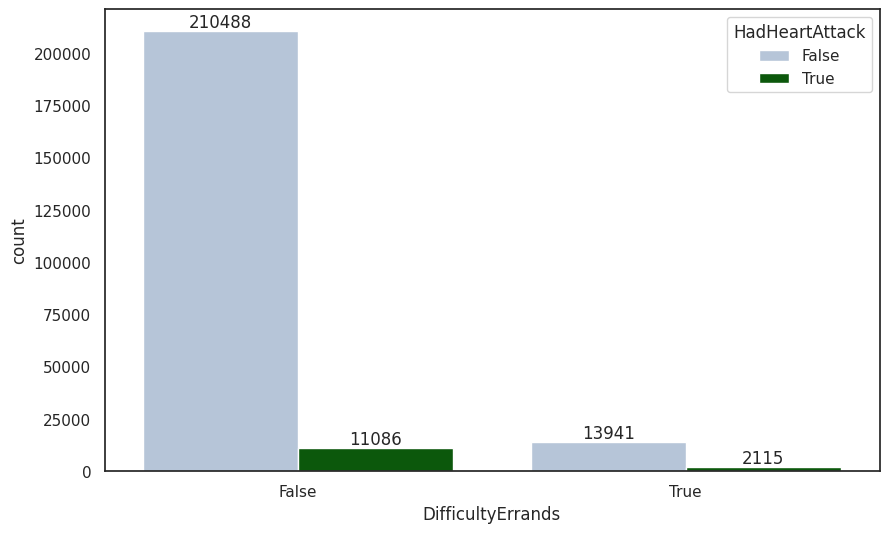

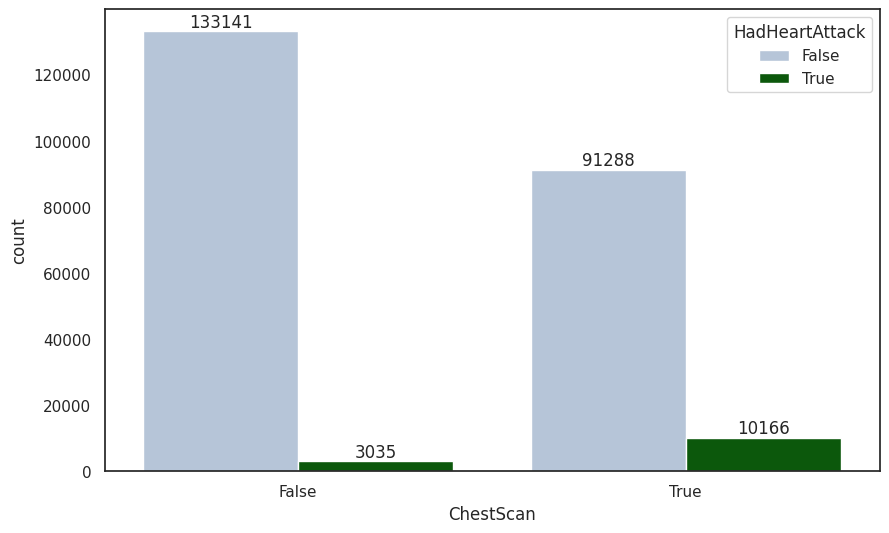

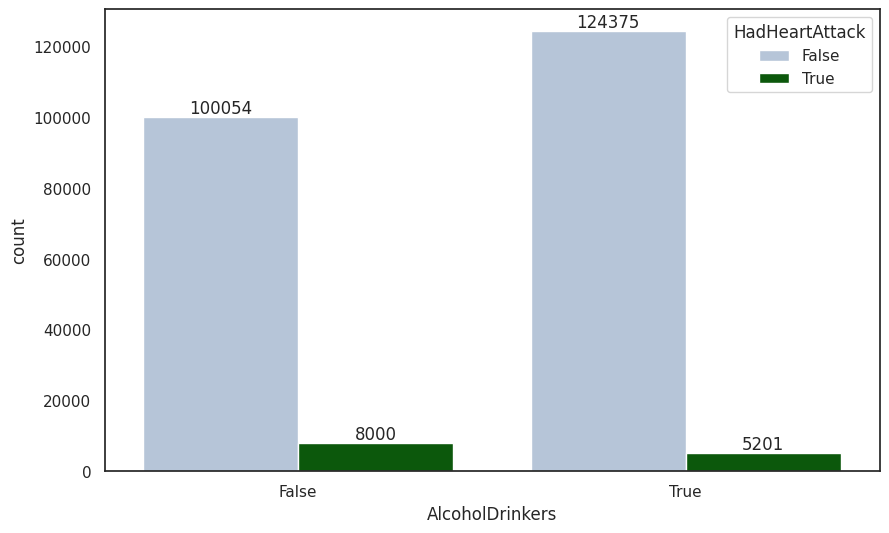

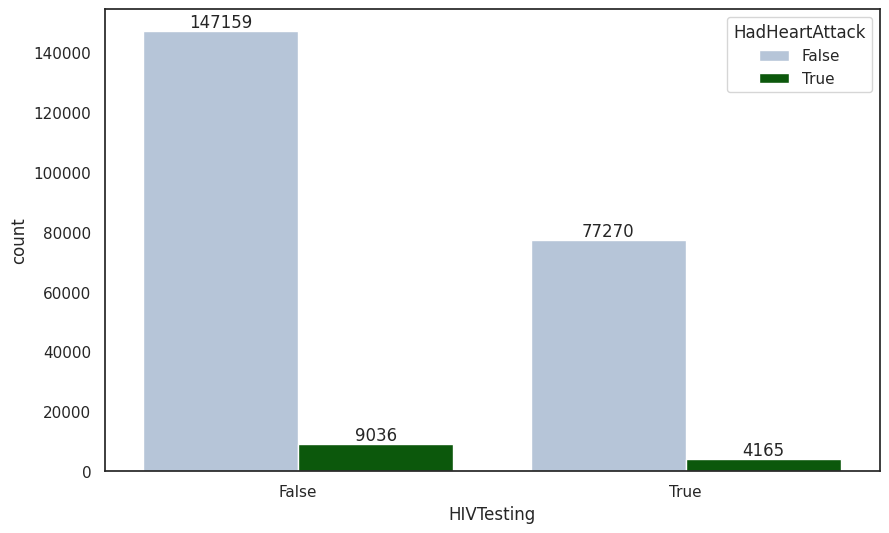

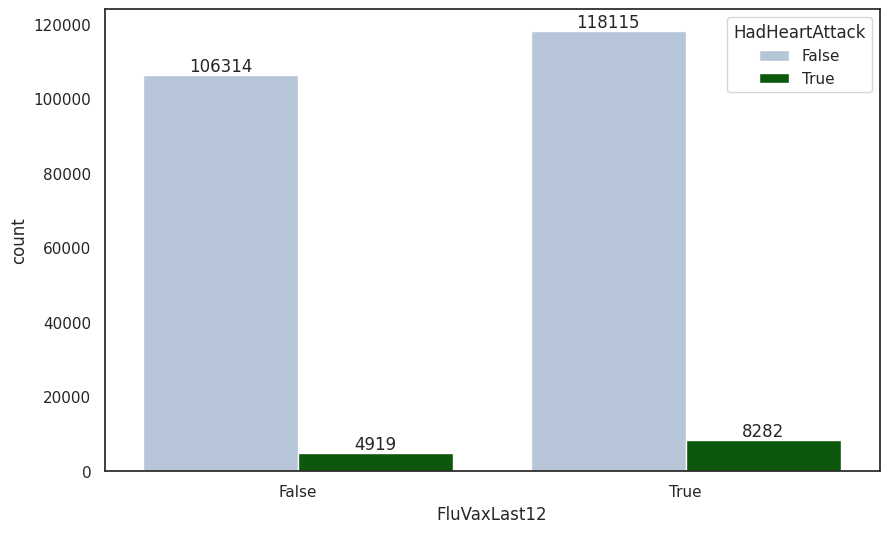

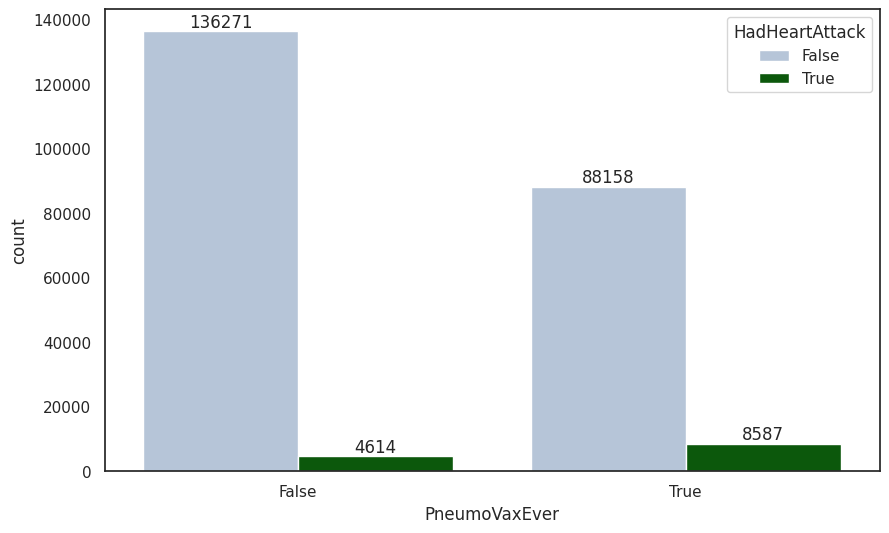

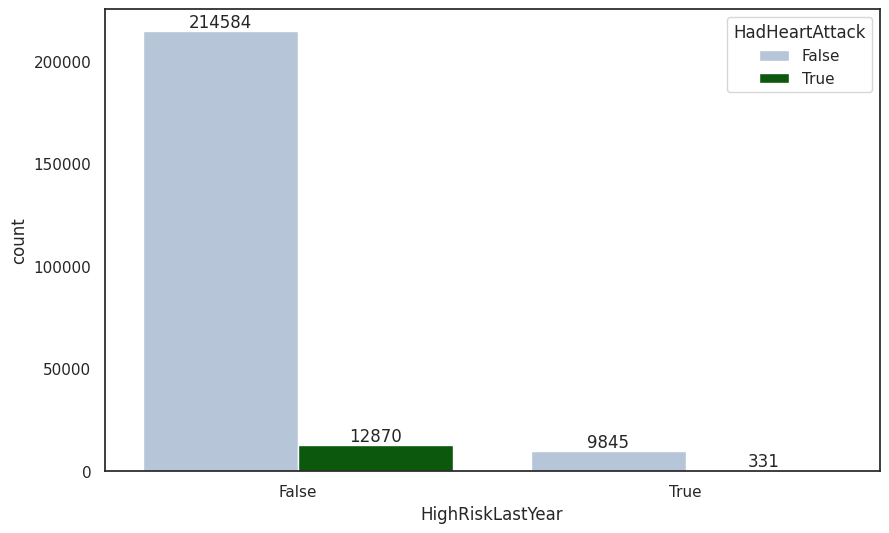

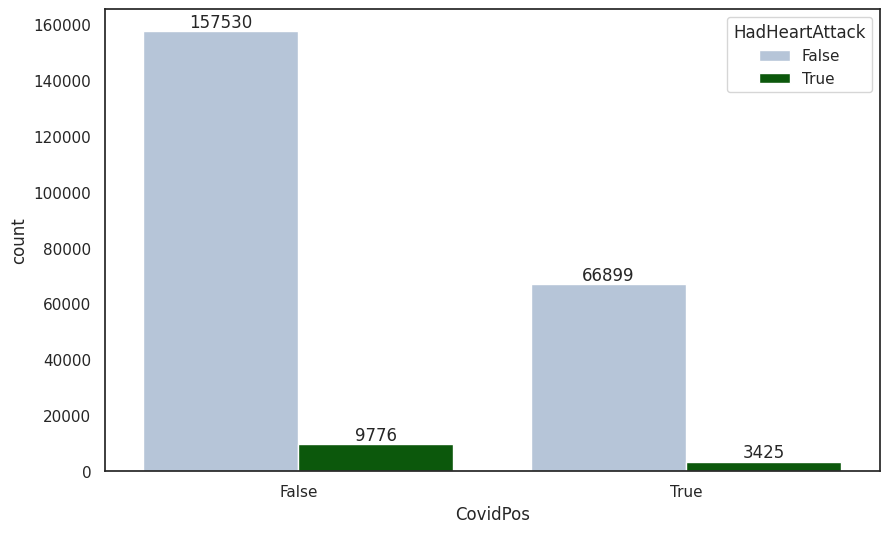

In [25]:
target_column='HadHeartAttack'
for obj_col in bool_cols:
    if len(df[obj_col].unique())>=20:
        print("Too many categories present in "+ obj_col+" only statictics will be provided")
        calculate_proportion(df,obj_col, target_column)
    else:
        print()
        create_graph_generate_proportion(df, obj_col, 'HadHeartAttack')

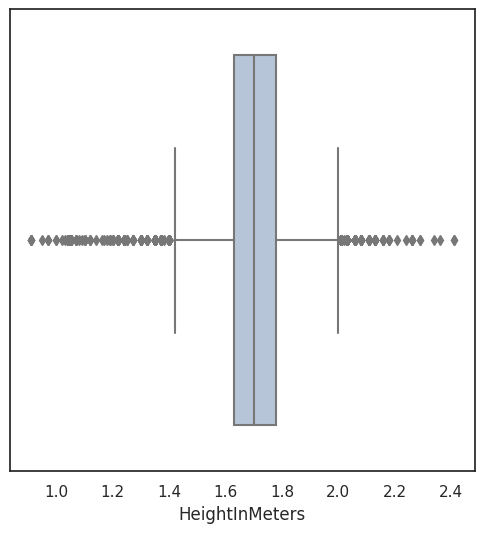

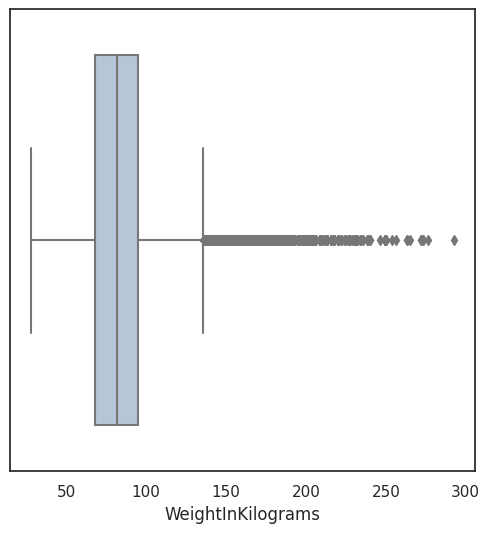

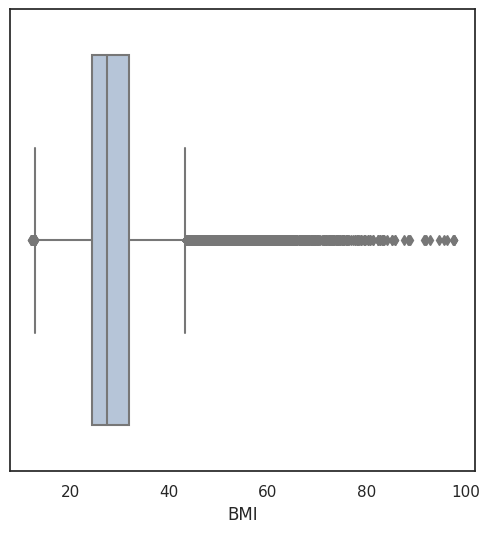

In [26]:
for col in numeric_cols:
    plt.figure(figsize=(6, 6))
    numerics_boxplot=sns.boxplot(data=df,x=col, hue=target_column, palette=palette)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


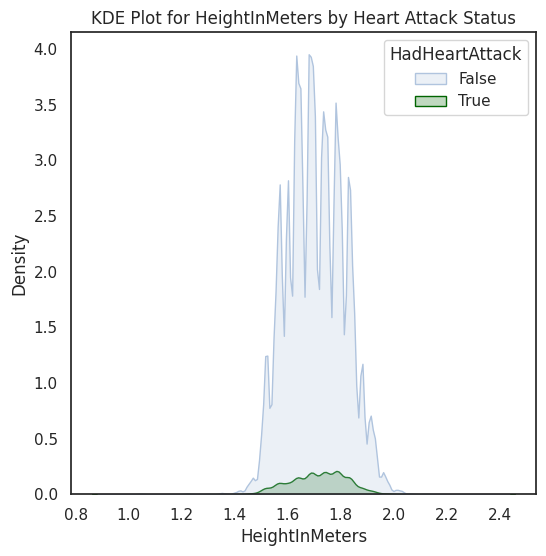

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


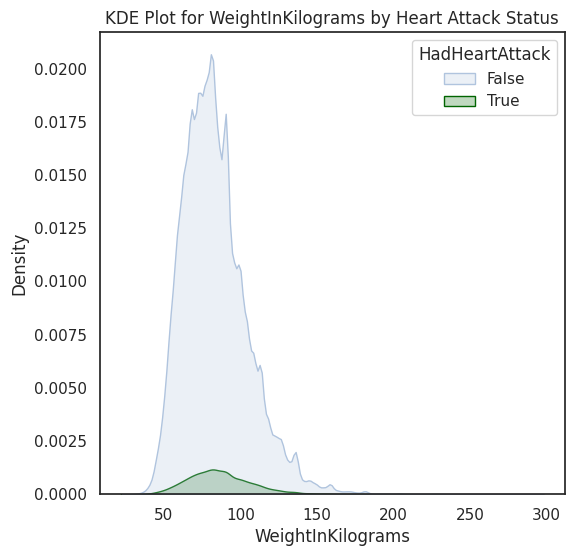

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


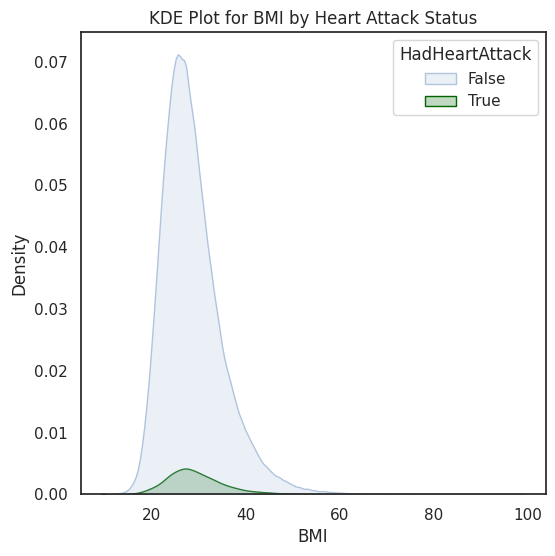

In [27]:
for col in numeric_cols:
    plt.figure(figsize=(6, 6))  
    sns.kdeplot(data=df, x=col, hue='HadHeartAttack', fill=True, palette=palette[:2]) 
    plt.title(f"KDE Plot for {col} by Heart Attack Status")
    plt.show()

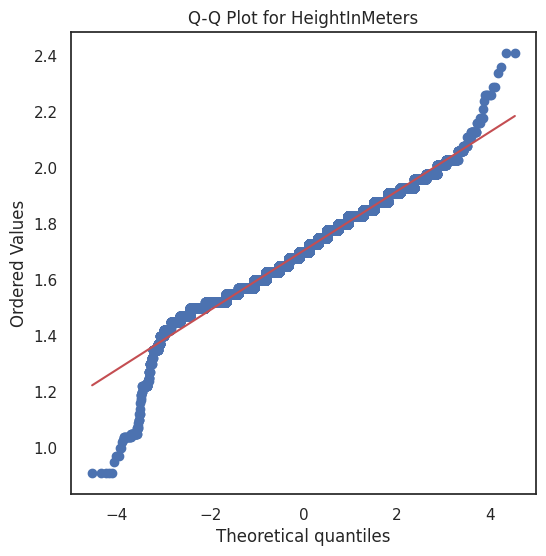

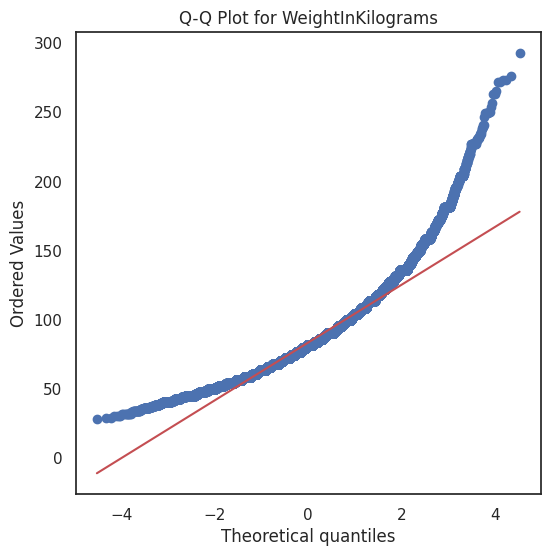

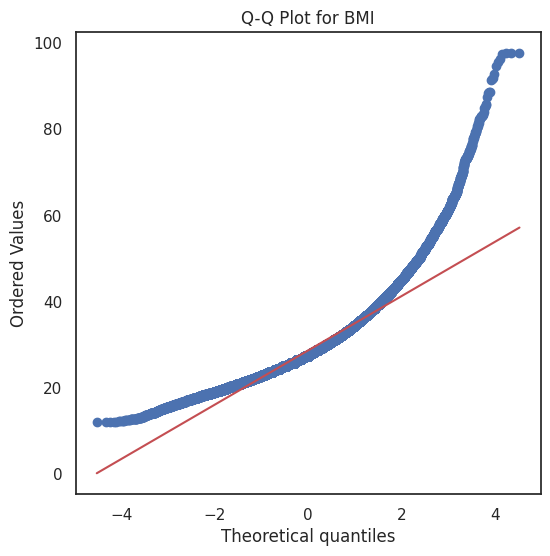

In [28]:
import scipy.stats as stats
for col in numeric_cols:
    plt.figure(figsize=(6, 6))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title('Q-Q Plot for '+col)
    plt.show()

In [32]:
df


,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,False,True,False,True,...,Never used e-cigarettes in my entire life,True,"White only, Non-Hispanic",False,False,False,True,"No, did not receive any tetanus shot in the pa...",False,True
1,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,False,False,False,False,...,Never used e-cigarettes in my entire life,False,"White only, Non-Hispanic",False,False,True,True,"Yes, received Tdap",False,False
2,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,False,False,False,False,...,Never used e-cigarettes in my entire life,False,"White only, Non-Hispanic",True,False,False,False,"Yes, received tetanus shot but not sure what type",False,False
3,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,False,False,False,False,...,Never used e-cigarettes in my entire life,False,"White only, Non-Hispanic",False,False,True,True,"Yes, received tetanus shot but not sure what type",False,False
4,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,False,False,False,False,...,Never used e-cigarettes in my entire life,True,"Black only, Non-Hispanic",False,False,True,False,"No, did not receive any tetanus shot in the pa...",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,False,False,False,False,...,Not at all (right now),False,Hispanic,False,False,True,False,"No, did not receive any tetanus shot in the pa...",False,False
237626,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,False,True,False,False,...,Not at all (right now),False,Hispanic,False,True,False,False,"Yes, received Tdap",False,False
237627,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,True,True,False,False,...,Not at all (right now),True,Hispanic,False,True,True,True,"Yes, received Tdap",True,False
237628,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,False,False,False,False,...,Never used e-cigarettes in my entire life,False,Hispanic,False,True,False,False,"No, did not receive any tetanus shot in the pa...",False,True


In [37]:
df_corelation_analysis


,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,False,True,False,True,...,Never used e-cigarettes in my entire life,True,"White only, Non-Hispanic",False,False,False,True,"No, did not receive any tetanus shot in the pa...",False,True
1,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,False,False,False,False,...,Never used e-cigarettes in my entire life,False,"White only, Non-Hispanic",False,False,True,True,"Yes, received Tdap",False,False
2,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,False,False,False,False,...,Never used e-cigarettes in my entire life,False,"White only, Non-Hispanic",True,False,False,False,"Yes, received tetanus shot but not sure what type",False,False
3,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,False,False,False,False,...,Never used e-cigarettes in my entire life,False,"White only, Non-Hispanic",False,False,True,True,"Yes, received tetanus shot but not sure what type",False,False
4,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,False,False,False,False,...,Never used e-cigarettes in my entire life,True,"Black only, Non-Hispanic",False,False,True,False,"No, did not receive any tetanus shot in the pa...",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,False,False,False,False,...,Not at all (right now),False,Hispanic,False,False,True,False,"No, did not receive any tetanus shot in the pa...",False,False
237626,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,False,True,False,False,...,Not at all (right now),False,Hispanic,False,True,False,False,"Yes, received Tdap",False,False
237627,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,True,True,False,False,...,Not at all (right now),True,Hispanic,False,True,True,True,"Yes, received Tdap",True,False
237628,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,False,False,False,False,...,Never used e-cigarettes in my entire life,False,Hispanic,False,True,False,False,"No, did not receive any tetanus shot in the pa...",False,True


In [35]:
corr=df_encoded.corr()

<Axes: >

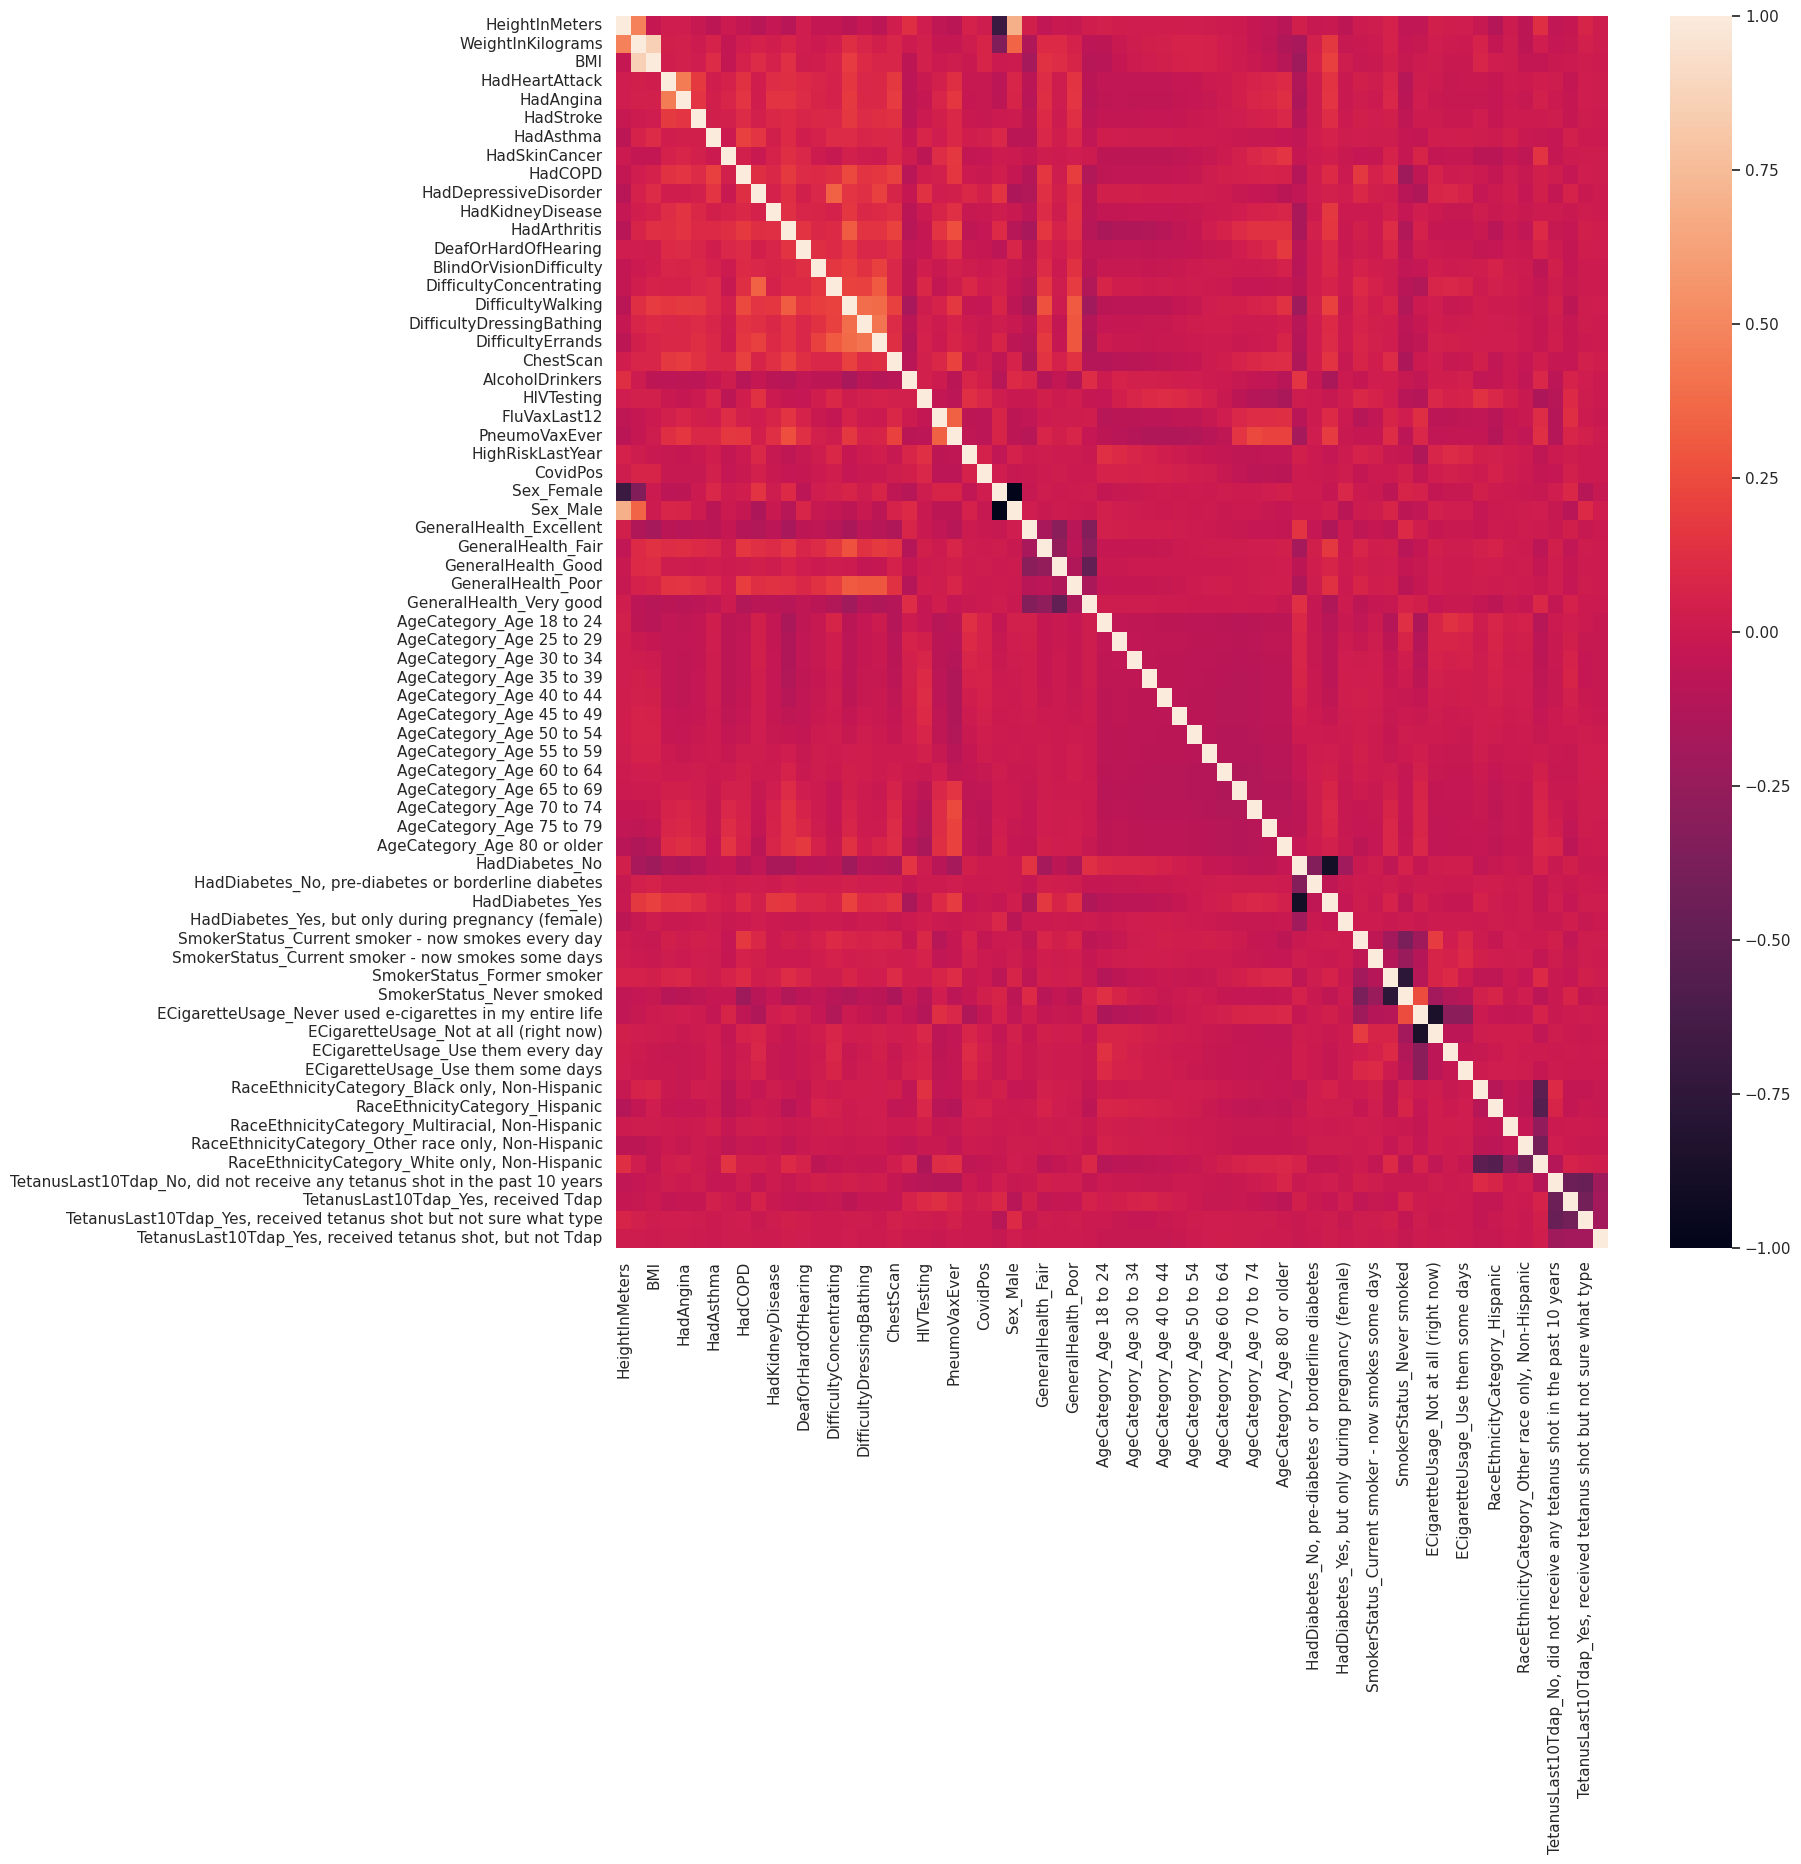

In [38]:
plt.figure(figsize=(16, 16))
sns.heatmap(corr)

In [39]:
for column in df_encoded.columns:
    print("Current column:", column)
    high_correlation_list = corr[column][abs(corr[column]) > 0.5].index.to_list()
    print("High correlation with", column, ":", high_correlation_list)

Current column: HeightInMeters
High correlation with HeightInMeters : ['HeightInMeters', 'Sex_Female', 'Sex_Male']
Current column: WeightInKilograms
High correlation with WeightInKilograms : ['WeightInKilograms', 'BMI']
Current column: BMI
High correlation with BMI : ['WeightInKilograms', 'BMI']
Current column: HadHeartAttack
High correlation with HadHeartAttack : ['HadHeartAttack']
Current column: HadAngina
High correlation with HadAngina : ['HadAngina']
Current column: HadStroke
High correlation with HadStroke : ['HadStroke']
Current column: HadAsthma
High correlation with HadAsthma : ['HadAsthma']
Current column: HadSkinCancer
High correlation with HadSkinCancer : ['HadSkinCancer']
Current column: HadCOPD
High correlation with HadCOPD : ['HadCOPD']
Current column: HadDepressiveDisorder
High correlation with HadDepressiveDisorder : ['HadDepressiveDisorder']
Current column: HadKidneyDisease
High correlation with HadKidneyDisease : ['HadKidneyDisease']
Current column: HadArthritis
High

In [41]:
def create_model_and_predictions(model_tuple, X_train, y_train, X_test, y_test):
    model_name, model = model_tuple
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    evaluate_model("Train",y_train,y_train_pred)
    evaluate_model("Test",y_test,y_test_pred)
    
    
def evaluate_model(train_or_test,y_actual,y_predicted):
    print()
    accuracy = accuracy_score(y_actual, y_predicted)
    precision = precision_score(y_actual, y_predicted, average='binary') 
    recall = recall_score(y_actual, y_predicted, average='binary')  
    cm = confusion_matrix(y_actual, y_predicted)

    print(f"{train_or_test} Accuracy: {accuracy:.4f}")
    print(f"{train_or_test} Precision: {precision:.4f}")
    print(f"{train_or_test} Recall: {recall:.4f}")
    print(f"{train_or_test} Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_actual, y_predicted))
    print("-" * 50)

In [42]:
X=df.drop('HadHeartAttack', axis=1)
y=df['HadHeartAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.7, random_state=42)

In [44]:
multicolumn_prep = ColumnTransformer([
    #('drop', 'drop', ['State', 'PatientID']),
    #('handle_missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encode_multicategorical', OneHotEncoder(sparse=False), ['HadDiabetes', 'Sex', 'GeneralHealth', 'AgeCategory', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'TetanusLast10Tdap']),
    ('feature_scaling', StandardScaler(), ['HeightInMeters', 'WeightInKilograms', 'BMI'])
], remainder='passthrough')

dataPreprocessing_pipeline = Pipeline(
    steps=[
        #('handle_missing', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('preprocessing', multicolumn_prep)
    ]
)

In [46]:
type(X_train)

pandas.core.frame.DataFrame

In [47]:
X_train_preprocessed=multicolumn_prep.fit_transform(X_train)
X_test_preprocessed=multicolumn_prep.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
type(X_train_preprocessed)

numpy.ndarray

In [50]:
models = [
    ('Random Forest', RandomForestClassifier(class_weight='balanced')),
    ('Logistic Regression', LogisticRegression(class_weight='balanced')),
    ('Support Vector Machine', SVC(class_weight='balanced')),
    ('Naive Bayes', GaussianNB()),  
    ('AdaBoost', AdaBoostClassifier())
]

In [ ]:
for model in models:
    create_model_and_predictions(model, X_train_preprocessed, y_train, X_test_preprocessed, y_test)

Training Random Forest...

Train Accuracy: 0.9999
Train Precision: 0.9995
Train Recall: 0.9995
Train Confusion Matrix:
[[67327     2]
 [    2  3958]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     67329
        True       1.00      1.00      1.00      3960

    accuracy                           1.00     71289
   macro avg       1.00      1.00      1.00     71289
weighted avg       1.00      1.00      1.00     71289

--------------------------------------------------

Test Accuracy: 0.9466
Test Precision: 0.5990
Test Recall: 0.1149
Test Confusion Matrix:
[[156389    711]
 [  8179   1062]]

Classification Report:
              precision    recall  f1-score   support

       False       0.95      1.00      0.97    157100
        True       0.60      0.11      0.19      9241

    accuracy                           0.95    166341
   macro avg       0.77      0.56      0.58    166341
weighted avg       0.93     